In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("dark")
sns.set_style("ticks")


# Read Data
- Use `dtype` for performance
- Rename `quality` to the target `label`
- Rename columns with spaces

In [7]:
df = pd.read_csv(
    Path("data", "winequality-red.csv",),
    dtype={
        "fixed acidity": float,
        "volatile acidity": float,
        "citric acid": float,
        "residual sugar": float,
        "chlorides": float,
        "free sulfur dioxide": float,
        "total sulfur dioxide": float,
        "density": float,
        "pH": float,
        "sulphates": float,
        "alcohol": float,
        "quality": int,
    },
).rename(
    columns={
        "fixed acidity": "fixed_acidity",
        "volatile acidity": "volatile_acidity",
        "citric acid": "citric_acid",
        "residual sugar": "residual_sugar",
        "free sulfur dioxide": "free_sulfur_dioxide",
        "total sulfur dioxide": "total_sulfur_dioxide",
        "quality": "label",
    }
)

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  label                 1599 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 143.8 KB


In [9]:
df.describe()



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
def save_eda_fig(save_as):
    plt.savefig(
        Path("eda", save_as,), orientation="portrait", format="png",
    )



### Data preperation
- Check labels distribution. Labels are very imbalanced
- Transform labels into binary classification. Labels are balanced
- Check for duplicates, plot duplicates per label, and drop duplicated rows
- Check for missing values. No missing values for any features
- Save processed data for training

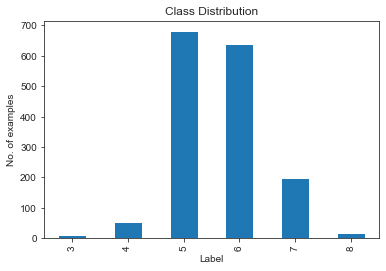

In [11]:
fig, ax = plt.subplots()
df.groupby("label").count()["density"].plot(kind="bar")
ax.set_xlabel("Label")
ax.set_ylabel("No. of examples")
ax.set_title("Class Distribution")
save_eda_fig("labels_distribution.png")


In [12]:
# Changing labels
df["label"] = df["label"].map({3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1,})


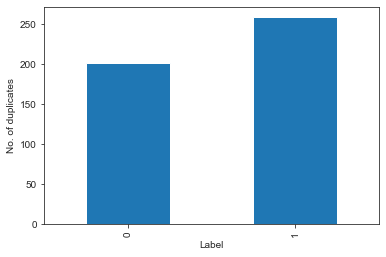

In [13]:
df_duplicated = df[df.duplicated(keep=False)]

fig, ax = plt.subplots()
df_duplicated.groupby("label").count()["density"].plot(kind="bar")
ax.set_xlabel("Label")
ax.set_ylabel("No. of duplicates")
save_eda_fig("duplicates_per_label.png")

df = df.drop_duplicates()

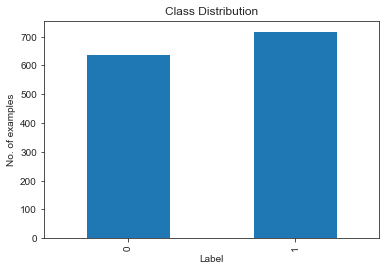

In [14]:

fig, ax = plt.subplots()
df.groupby("label").count()["density"].plot(kind="bar")
ax.set_xlabel("Label")
ax.set_ylabel("No. of examples")
ax.set_title("Class Distribution")
save_eda_fig("labels_distribution.png")

In [15]:
df.isna().sum()


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
label                   0
dtype: int64

In [16]:
# Save for training
df.to_csv(Path("data", "winequality-red-processed.csv",))



# Features visualization
- Plot boxplots for all features on a log scale.
- Plot scatter matrix to check for features distribution and correlation
- Plot boxplots and scatter graphs to inspect correlated variables
- Regression to examine further correlation

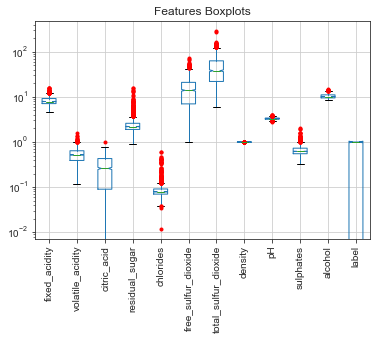

In [17]:
fig, ax = plt.subplots()
df.boxplot(sym="r.", notch=True)
ax.set_yscale("log")
ax.tick_params(axis="x", labelrotation=90)
ax.set_title("Features Boxplots")
save_eda_fig("features_boxplots.png")


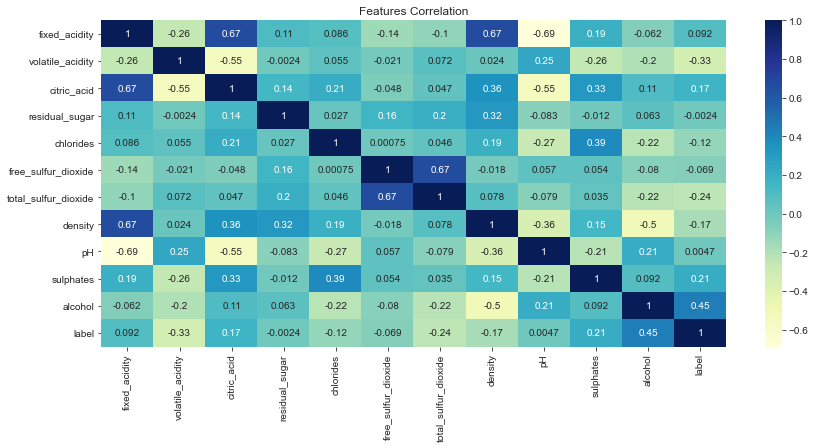

In [18]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
ax.set_title("Features Correlation")
save_eda_fig("features_scatter_matrix.png")


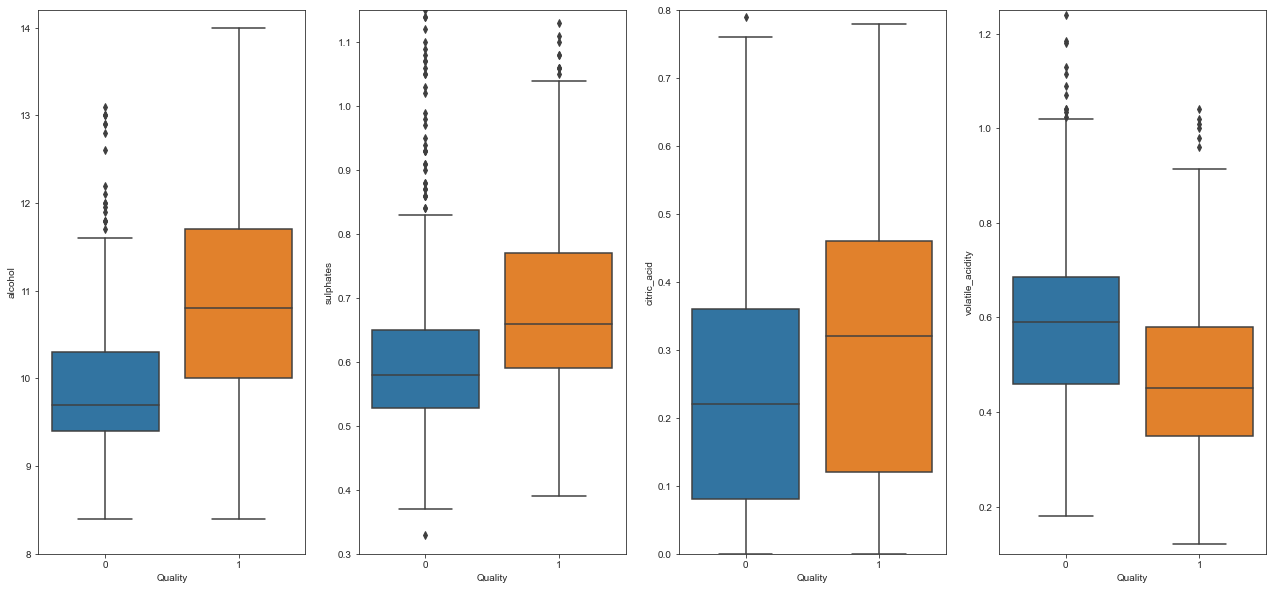

In [19]:

fig, axes = plt.subplots(1, 4, sharex=True, figsize=(22, 10))
sns.boxplot(
    ax=axes[0], y=df["alcohol"], x=df["label"],
)
axes[0].set(ylim=(8, 14.2), xlabel="Quality")

sns.boxplot(ax=axes[1], y=df["sulphates"], x=df["label"])
axes[1].set(ylim=(0.3, 1.15), xlabel="Quality")

sns.boxplot(ax=axes[2], y=df["citric_acid"], x=df["label"])
axes[2].set(ylim=(0, 0.8), xlabel="Quality")

sns.boxplot(ax=axes[3], y=df["volatile_acidity"], x=df["label"])
axes[3].set(ylim=(0.1, 1.25), xlabel="Quality")
save_eda_fig("Features_correlation_quality.png")


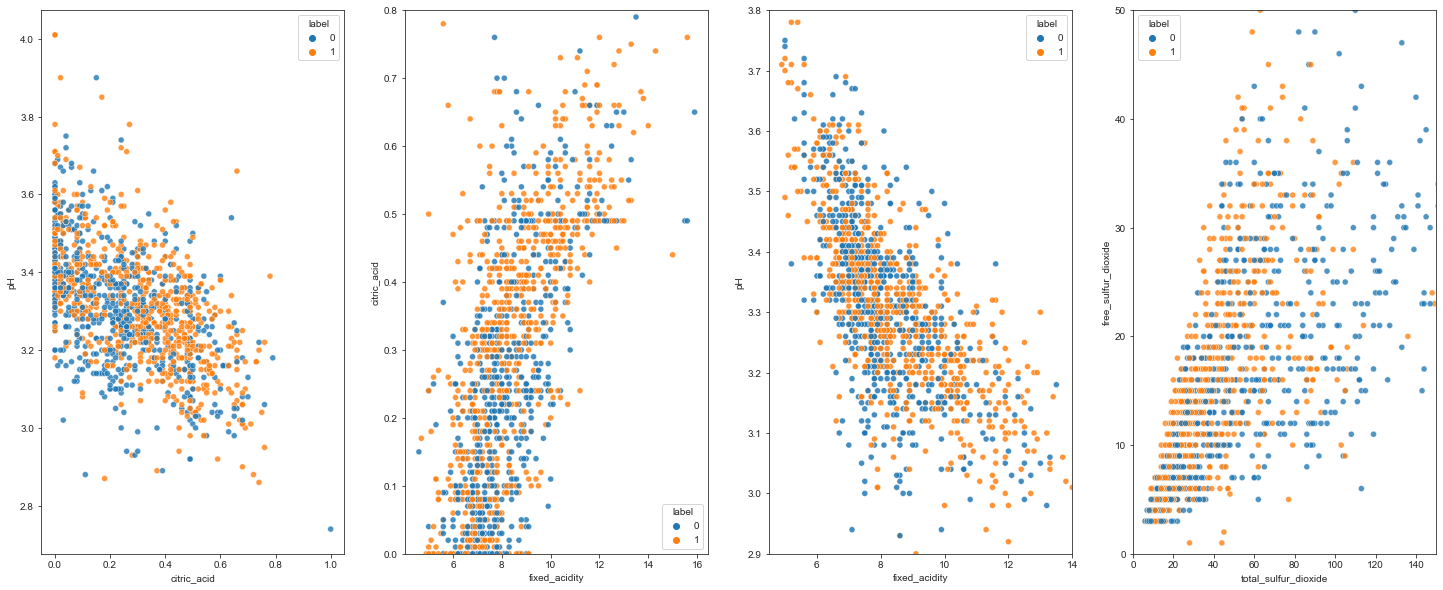

In [20]:

fig, axes = plt.subplots(1, 4, figsize=(25, 10))
sns.scatterplot(
    ax=axes[0],
    y=df["pH"],
    x=df["citric_acid"],
    hue=df["label"],
    # palette=sns.color_palette("coolwarm", as_cmap=True),
    alpha=0.8,
)

sns.scatterplot(
    ax=axes[1],
    y=df["citric_acid"],
    x=df["fixed_acidity"],
    hue=df["label"],
    #  palette=sns.color_palette("coolwarm", as_cmap=True),
    alpha=0.82,
)
axes[1].set(ylim=(0, 0.8))

sns.scatterplot(
    ax=axes[2],
    y=df["pH"],
    x=df["fixed_acidity"],
    hue=df["label"],
    #  palette=sns.color_palette("coolwarm", as_cmap=True),
    alpha=0.84,
)
axes[2].set(xlim=(4.5, 14), ylim=(2.9, 3.8))

sns.scatterplot(
    ax=axes[3],
    y=df["free_sulfur_dioxide"],
    x=df["total_sulfur_dioxide"],
    hue=df["label"],
    # palette=sns.color_palette("coolwarm", as_cmap=True),
    alpha=0.78,
)
axes[3].set(xlim=(0, 150), ylim=(0, 50))
save_eda_fig("Features_correlation_features.png")



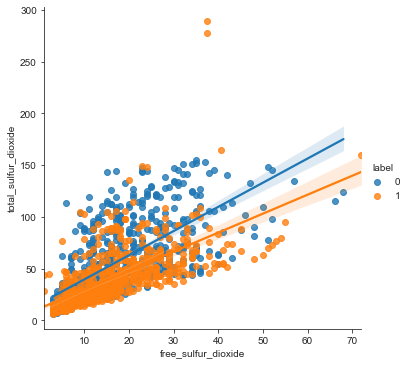

In [21]:

sns.lmplot(
    y="total_sulfur_dioxide", x="free_sulfur_dioxide", hue="label", data=df,
)
ax.set(xlim=(0, 70), ylim=(0, 150))
save_eda_fig("Reg_plot.png")
